In [801]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import linear_model

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',-1)

The purpose of this project is to explore the US Mass Shootings Data from Kaggle to answer below questions:

• How many people got killed and injured per year?

• Visualize mass shootings on the U.S map

• Is there any correlation between shooter and his/her race, gender

• Any correlation with calendar dates? Do we have more deadly days, weeks or months on average

• What cities and states are more prone to such attacks

• Can you find and combine any other external datasets to enrich the analysis, for example, gun ownership by state

• Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event

• How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition.



In [802]:
df = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding = "ISO-8859-1", parse_dates=["Date"])

In [803]:
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force officer, shot and killed 26 people and wounded 20 at a church in Texas. He was found dead later in his vehicle.",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart in a suburb north of Denver and fatally shot two men and a woman, then left the store and drove away. After an all-night manhunt, Ostrem, who had financial problems but no serious criminal history, was captured by police after being spotted near his apartment in Denver.",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three people and wounded two others around 9am at Advance Granite Solutions, a home remodeling business where he worked near Baltimore. Hours later he shot and wounded a sixth person at a car dealership in Wilmington, Delaware. He was apprehended that evening following a manhunt by authorities.",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32nd floor of Manadalay Bay hotel at Last Vegas concert goers for no obvious reason. He shot himself and died on arrival of law enforcement agents. He was 64",59,527,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers and wounded two others inside a UPS facility in San Francisco. Lam killed himself as law enforcement officers responded to the scene.",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [804]:
df = df.sort_values('Date')
df.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
322,323,University of Texas at Austin,"Austin, Texas",1966-08-01,University of Texas,Close,random,terrorism,"On August 1, 1966, a 25-year-old engineering student at the University of Texas in Austin killed sixteen people and wounded thirty-two others in and around the Tower of the University of Texas. Prior to commencing the mass shootings at the University, the student and former U.S. Marine, had murdered both his wife and mother in Austin, Texas.",17,32,48,0.0,25,NaN,NaN,Yes,White American or European American,Male,30.198887,-97.844159
321,322,Rose-Mar College of Beauty,"Mesa, Arizona",1966-11-12,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high school student entered the Rose-Mar College of Beauty in Mesa, Arizona, ordering his victims to lay on the ground in a circle. The gunman shot and killed four women and a child and injured another woman and an infant. He considered a few sites, like his school, where he thought of wiping out the teachers. Finally, he settled on the Rose-Mar College of Beauty, where he thought he'd get a nice large group of victims.",5,1,6,0.0,18,NaN,NaN,Yes,White American or European American,Male,33.422687,-111.816320
320,321,St. Aloysius Church,"Spokane, Washington",1971-11-11,Church,Close,random,terrorism,"On November 11, 1971, a former MIT student entered St. Aloysius Roman Catholic Church on the Gonzaga University campus. The shooter killed the caretaker and wounded four more people before he was killed by police.",2,4,5,0.0,NaN,NaN,NaN,Yes,White American or European American,Male,47.673674,-117.415984
319,320,New Orleans Police Shootings,"New Orleans, Louisiana",1972-12-31,NaN,NaN,random,psycho,"On New Year's Eve in 1972, a 23-year-old ex-Navy dental technician went to the central lockup New Orleans Police Department and shot four policeman that day. Seven days later on January 7, 1973, the shooter shot a grocer and entered the Downtown Howard Johnson Hotel where he shot seventeen people before killed him at the top of the hotel roof.",10,13,22,4.0,23,NaN,NaN,Yes,Black American or African American,Male,30.068724,-89.931474
318,319,Clara Barton Elementary School,"Chicago, Illinois",1974-01-17,Clara Barton Elementary School,Close,Teachers,anger,"On January 17, 1974, a 14-year-old student entered Clara Barton Elementary School in Chicago, Illinois and killed the principal and wounded three others before he was seized by a teacher when both his guns jammed. Apparently, the student was angry at the fact that he had been expelled from the school and transferred to a social adjustment center earlier that week.",1,3,4,0.0,14,NaN,NaN,Yes,Unknown,Male,41.839280,-87.688181


In [805]:
df.isnull().sum()

S#                      0  
Title                   0  
Location                45 
Date                    0  
Incident Area           62 
Open/Close Location     28 
Target                  5  
Cause                   77 
Summary                 0  
Fatalities              0  
Injured                 0  
Total victims           0  
Policeman Killed        6  
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues    0  
Race                    2  
Gender                  0  
Latitude                20 
Longitude               20 
dtype: int64

In [806]:
df.shape

(323, 21)

# Create a US population DataFrame by year

http://www.multpl.com/united-states-population/table

In [807]:
population_dict = {'date': {pd.Timestamp('1966-01-01'): pd.Timestamp('1966-01-01'),
  pd.Timestamp('1967-01-01'): pd.Timestamp('1967-01-01'),
  pd.Timestamp('1968-01-01'): pd.Timestamp('1968-01-01'),
  pd.Timestamp('1969-01-01'): pd.Timestamp('1969-01-01'),
  pd.Timestamp('1970-01-01'): pd.Timestamp('1970-01-01'),
  pd.Timestamp('1971-01-01'): pd.Timestamp('1971-01-01'),
  pd.Timestamp('1972-01-01'): pd.Timestamp('1972-01-01'),
  pd.Timestamp('1973-01-01'): pd.Timestamp('1973-01-01'),
  pd.Timestamp('1974-01-01'): pd.Timestamp('1974-01-01'),
  pd.Timestamp('1975-01-01'): pd.Timestamp('1975-01-01'),
  pd.Timestamp('1976-01-01'): pd.Timestamp('1976-01-01'),
  pd.Timestamp('1977-01-01'): pd.Timestamp('1977-01-01'),
  pd.Timestamp('1978-01-01'): pd.Timestamp('1978-01-01'),
  pd.Timestamp('1979-01-01'): pd.Timestamp('1979-01-01'),
  pd.Timestamp('1980-01-01'): pd.Timestamp('1980-01-01'),
  pd.Timestamp('1981-01-01'): pd.Timestamp('1981-01-01'),
  pd.Timestamp('1982-01-01'): pd.Timestamp('1982-01-01'),
  pd.Timestamp('1983-01-01'): pd.Timestamp('1983-01-01'),
  pd.Timestamp('1984-01-01'): pd.Timestamp('1984-01-01'),
  pd.Timestamp('1985-01-01'): pd.Timestamp('1985-01-01'),
  pd.Timestamp('1986-01-01'): pd.Timestamp('1986-01-01'),
  pd.Timestamp('1987-01-01'): pd.Timestamp('1987-01-01'),
  pd.Timestamp('1988-01-01'): pd.Timestamp('1988-01-01'),
  pd.Timestamp('1989-01-01'): pd.Timestamp('1989-01-01'),
  pd.Timestamp('1990-01-01'): pd.Timestamp('1990-01-01'),
  pd.Timestamp('1991-01-01'): pd.Timestamp('1991-01-01'),
  pd.Timestamp('1992-01-01'): pd.Timestamp('1992-01-01'),
  pd.Timestamp('1993-01-01'): pd.Timestamp('1993-01-01'),
  pd.Timestamp('1994-01-01'): pd.Timestamp('1994-01-01'),
  pd.Timestamp('1995-01-01'): pd.Timestamp('1995-01-01'),
  pd.Timestamp('1996-01-01'): pd.Timestamp('1996-01-01'),
  pd.Timestamp('1997-01-01'): pd.Timestamp('1997-01-01'),
  pd.Timestamp('1998-01-01'): pd.Timestamp('1998-01-01'),
  pd.Timestamp('1999-01-01'): pd.Timestamp('1999-01-01'),
  pd.Timestamp('2000-01-01'): pd.Timestamp('2000-01-01'),
  pd.Timestamp('2001-01-01'): pd.Timestamp('2001-01-01'),
  pd.Timestamp('2002-01-01'): pd.Timestamp('2002-01-01'),
  pd.Timestamp('2003-01-01'): pd.Timestamp('2003-01-01'),
  pd.Timestamp('2004-01-01'): pd.Timestamp('2004-01-01'),
  pd.Timestamp('2005-01-01'): pd.Timestamp('2005-01-01'),
  pd.Timestamp('2006-01-01'): pd.Timestamp('2006-01-01'),
  pd.Timestamp('2007-01-01'): pd.Timestamp('2007-01-01'),
  pd.Timestamp('2008-01-01'): pd.Timestamp('2008-01-01'),
  pd.Timestamp('2009-01-01'): pd.Timestamp('2009-01-01'),
  pd.Timestamp('2010-01-01'): pd.Timestamp('2010-01-01'),
  pd.Timestamp('2011-01-01'): pd.Timestamp('2011-01-01'),
  pd.Timestamp('2012-01-01'): pd.Timestamp('2012-01-01'),
  pd.Timestamp('2013-01-01'): pd.Timestamp('2013-01-01'),
  pd.Timestamp('2014-01-01'): pd.Timestamp('2014-01-01'),
  pd.Timestamp('2015-01-01'): pd.Timestamp('2015-01-01'),
  pd.Timestamp('2016-01-01'): pd.Timestamp('2016-01-01'),
  pd.Timestamp('2017-01-01'): pd.Timestamp('2017-01-01')},
 'population': {pd.Timestamp('1966-01-01 00:00:00'): 196.56,
  pd.Timestamp('1967-01-01'): 198.7,
  pd.Timestamp('1968-01-01'): 200.7,
  pd.Timestamp('1969-01-01'): 202.6,
  pd.Timestamp('1970-01-01'): 205.0,
  pd.Timestamp('1971-01-01'): 207.66,
  pd.Timestamp('1972-01-01'): 209.9,
  pd.Timestamp('1973-01-01'): 211.9,
  pd.Timestamp('1974-01-01'): 213.8,
  pd.Timestamp('1975-01-01'): 215.9,
  pd.Timestamp('1976-01-01'): 218.0,
  pd.Timestamp('1977-01-01'): 220.2,
  pd.Timestamp('1978-01-01'): 222.5,
  pd.Timestamp('1979-01-01'): 225.0,
  pd.Timestamp('1980-01-01'): 227.2,
  pd.Timestamp('1981-01-01'): 229.4,
  pd.Timestamp('1982-01-01'): 231.6,
  pd.Timestamp('1983-01-01'): 233.7,
  pd.Timestamp('1984-01-01'): 235.8,
  pd.Timestamp('1985-01-01'): 237.9,
  pd.Timestamp('1986-01-01'): 240.1,
  pd.Timestamp('1987-01-01'): 242.2,
  pd.Timestamp('1988-01-01'): 244.5,
  pd.Timestamp('1989-01-01'): 246.8,
  pd.Timestamp('1990-01-01'): 249.6,
  pd.Timestamp('1991-01-01'): 252.9,
  pd.Timestamp('1992-01-01'): 256.5,
  pd.Timestamp('1993-01-01'): 259.9,
  pd.Timestamp('1994-01-01'): 263.1,
  pd.Timestamp('1995-01-01'): 266.2,
  pd.Timestamp('1996-01-01'): 269.3,
  pd.Timestamp('1997-01-01'): 272.6,
  pd.Timestamp('1998-01-01'): 275.8,
  pd.Timestamp('1999-01-01'): 279.0,
  pd.Timestamp('2000-01-01'): 282.1,
  pd.Timestamp('2001-01-01'): 284.9,
  pd.Timestamp('2002-01-01'): 287.6,
  pd.Timestamp('2003-01-01'): 290.1,
  pd.Timestamp('2004-01-01'): 292.8,
  pd.Timestamp('2005-01-01'): 295.5,
  pd.Timestamp('2006-01-01'): 298.3,
  pd.Timestamp('2007-01-01'): 301.2,
  pd.Timestamp('2008-01-01'): 304.0,
  pd.Timestamp('2009-01-01'): 306.7,
  pd.Timestamp('2010-01-01'): 309.3,
  pd.Timestamp('2011-01-01'): 311.6,
  pd.Timestamp('2012-01-01'): 314.0,
  pd.Timestamp('2013-01-01'): 316.1,
  pd.Timestamp('2014-01-01'): 318.5,
  pd.Timestamp('2015-01-01'): 320.8,
  pd.Timestamp('2016-01-01'): 323.1,
  pd.Timestamp('2017-01-01'): 325.3}}
df_popu = pd.DataFrame(population_dict)
df_popu.columns = ['date','population']
# set df_population.date to datetime format
df_popu.date = pd.to_datetime(df_popu.date)
# set dataframe index to Date colume
df_popu.index = df_popu.date

In [808]:
df_popu.head()

,date,population
date,,
1966-01-01,1966-01-01,196.56
1967-01-01,1967-01-01,198.70
1968-01-01,1968-01-01,200.70
1969-01-01,1969-01-01,202.60
1970-01-01,1970-01-01,205.00


In [809]:
# Convert df.Date to Datetime format

df.Date = pd.to_datetime(df.Date)

In [810]:
# set df index to Date column
df.index = df.Date

In [811]:
df.head(2)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,,,,,
1966-08-01,323,University of Texas at Austin,"Austin, Texas",1966-08-01,University of Texas,Close,random,terrorism,"On August 1, 1966, a 25-year-old engineering student at the University of Texas in Austin killed sixteen people and wounded thirty-two others in and around the Tower of the University of Texas. Prior to commencing the mass shootings at the University, the student and former U.S. Marine, had murdered both his wife and mother in Austin, Texas.",17,32,48,0.0,25,NaN,NaN,Yes,White American or European American,Male,30.198887,-97.844159
1966-11-12,322,Rose-Mar College of Beauty,"Mesa, Arizona",1966-11-12,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high school student entered the Rose-Mar College of Beauty in Mesa, Arizona, ordering his victims to lay on the ground in a circle. The gunman shot and killed four women and a child and injured another woman and an infant. He considered a few sites, like his school, where he thought of wiping out the teachers. Finally, he settled on the Rose-Mar College of Beauty, where he thought he'd get a nice large group of victims.",5,1,6,0.0,18,NaN,NaN,Yes,White American or European American,Male,33.422687,-111.816320


In [812]:
df.isnull().sum()

S#                      0  
Title                   0  
Location                45 
Date                    0  
Incident Area           62 
Open/Close Location     28 
Target                  5  
Cause                   77 
Summary                 0  
Fatalities              0  
Injured                 0  
Total victims           0  
Policeman Killed        6  
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues    0  
Race                    2  
Gender                  0  
Latitude                20 
Longitude               20 
dtype: int64

In [813]:
df_population.isnull().sum()

date          0
population    0
dtype: int64

# How many shooting per year?

Let's analyse the number of attack each year (1966 - 2017)

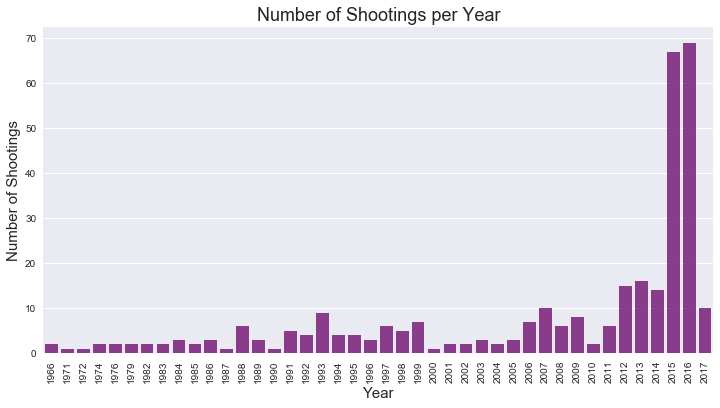

In [814]:
df['Year'] = df['Date'].dt.year

cnt_srs = df['Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='purple')
plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Shootings', fontsize=15)
plt.title('Number of Shootings per Year', fontsize=18)
plt.show()

# Let's check the number of attacks every 5 years

In [815]:
date = pd.date_range(start='1966-01-01', end='2017-01-01', freq='AS')

# AS indicate year start frequency
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

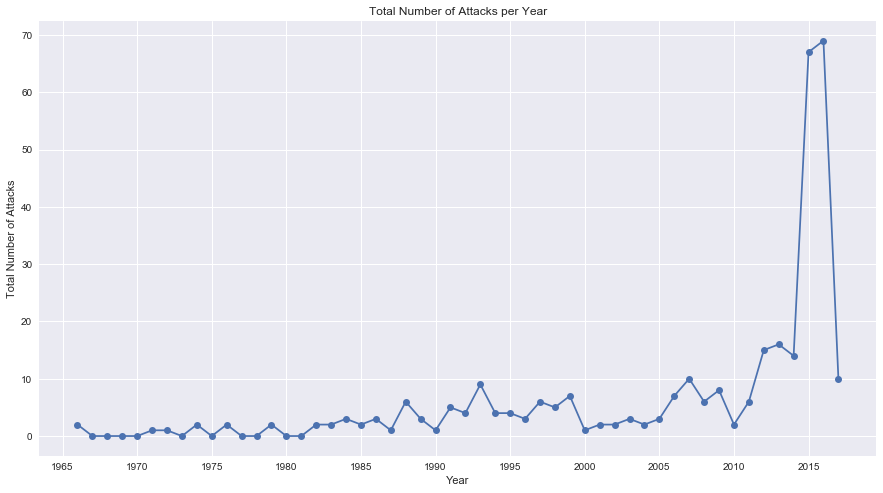

In [816]:
fig,ax = plt.subplots(figsize= (15,8))
ax.plot(date,df.Fatalities.resample('AS').count(),'-o')
# set xaxis major labels
ax.xaxis.set_major_locator(mdates.YearLocator(5,month=1,day=1)) # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# set grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Total Number of Attacks');
plt.title('Total Number of Attacks per Year')

As we can see, there has been a gradual increased in attacks since 2010 and a massive increase in 2016 then a big drop in 2017.

Is there a possibility that the gradual increase is due to increase in population per year? Well, let check attacks per Million people each year. 

# Attacks per Million people each year.

Numbers of attack every 5 years per Million people

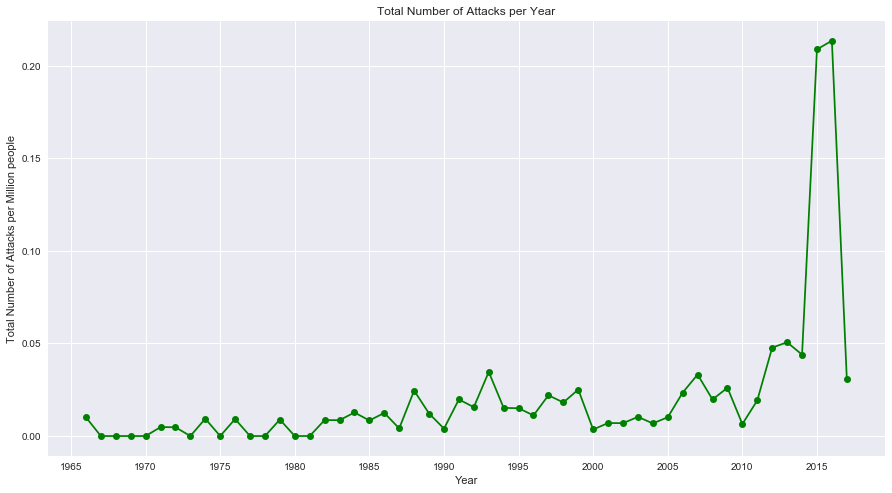

In [817]:
pop_num = df_popu.population #Population column from df_popu
count = df.Fatalities.resample('AS').count() # Total numbers of fatalities
fatal_count = count / pop_num # Number of attacks per population
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(date,fatal_count,'-o', color = 'g')
# major labels
ax.xaxis.set_major_locator(mdates.YearLocator(5,month=1,day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Total Number of Attacks per Million people')
plt.title('Total Number of Attacks per Year')

There seems to be consistency between the number of attack each year graph and the number of attacks per Million people each year graph.

# How many people got killed and injured per year?

Number of People that got killed per year

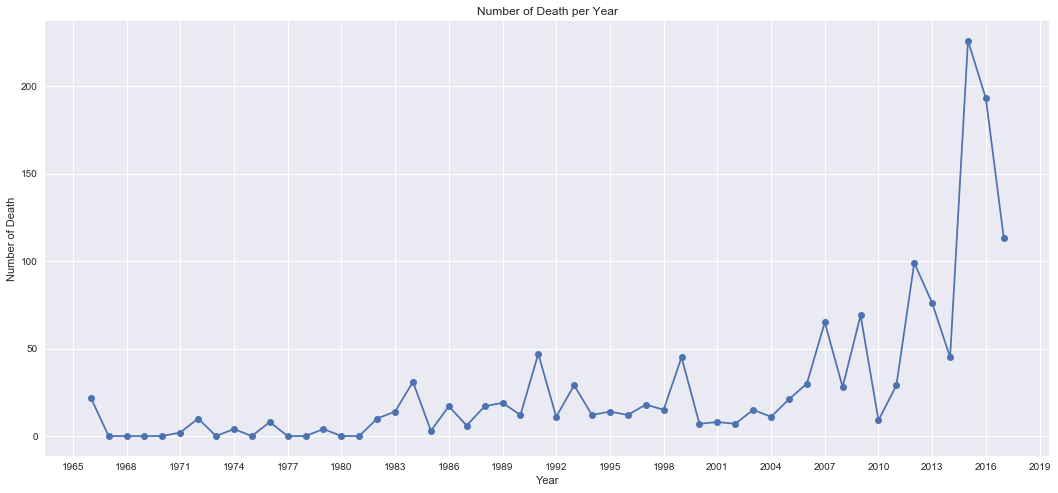

In [818]:
fig,ax = plt.subplots(figsize= (18,8))
ax.plot(date,df.Fatalities.resample('AS').sum().fillna(0),'-o')
# set xaxis major labels
ax.xaxis.set_major_locator(mdates.YearLocator(3,month=1,day=1)) # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# set grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Number of Death');
plt.title('Number of Death per Year')

Number of People that got injured per year

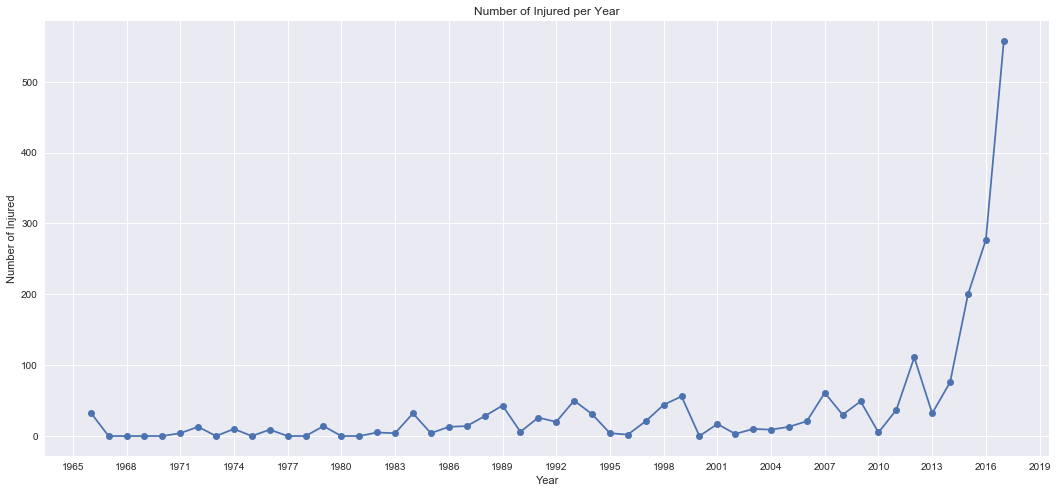

In [819]:
fig,ax = plt.subplots(figsize= (18,8))
ax.plot(date,df.Injured.resample('AS').sum().fillna(0),'-o')
# set xaxis major labels
ax.xaxis.set_major_locator(mdates.YearLocator(3,month=1,day=1)) # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# set grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Number of Injured');
plt.title('Number of Injured per Year')

Total number of victims per year

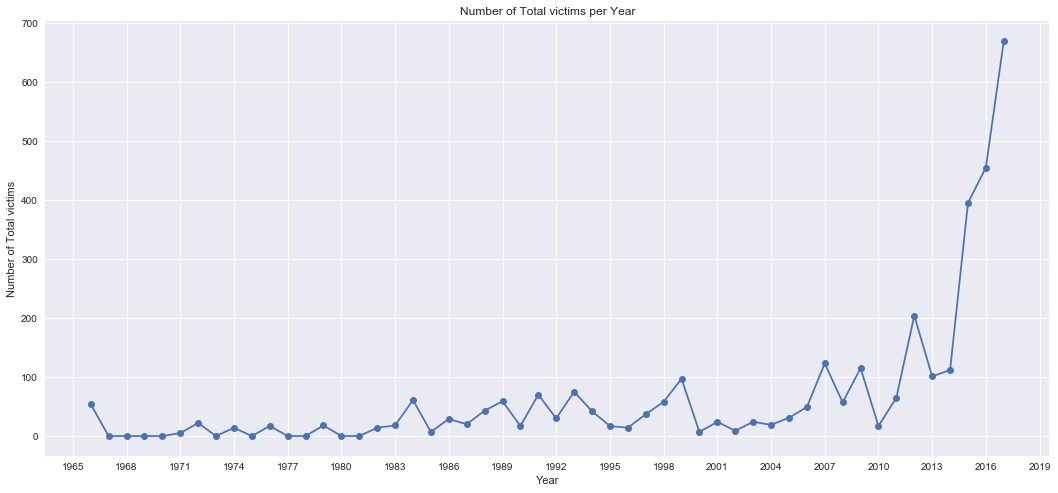

In [820]:
fig,ax = plt.subplots(figsize= (18,8))
ax.plot(date,df['Total victims'].resample('AS').sum().fillna(0),'-o')
# set xaxis major labels
ax.xaxis.set_major_locator(mdates.YearLocator(3,month=1,day=1)) # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# set grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Number of Total victims');
plt.title('Number of Total victims per Year')

Total number of Policeman Killed per year

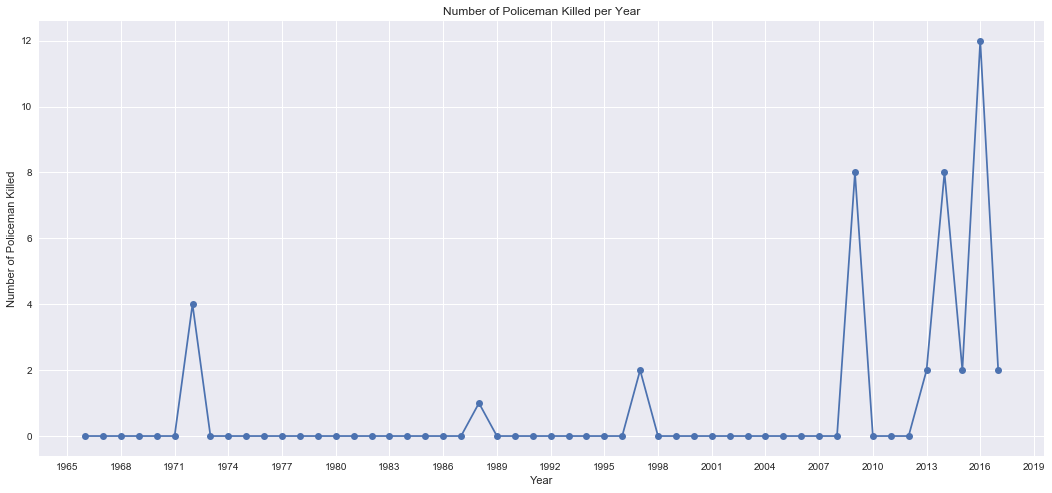

In [821]:
fig,ax = plt.subplots(figsize= (18,8))
ax.plot(date,df['Policeman Killed'].resample('AS').sum().fillna(0),'-o')
# set xaxis major labels
ax.xaxis.set_major_locator(mdates.YearLocator(3,month=1,day=1)) # Every 3 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# set grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Number of Policeman Killed');
plt.title('Number of Policeman Killed per Year')

How many shooting (Million Population) per year?

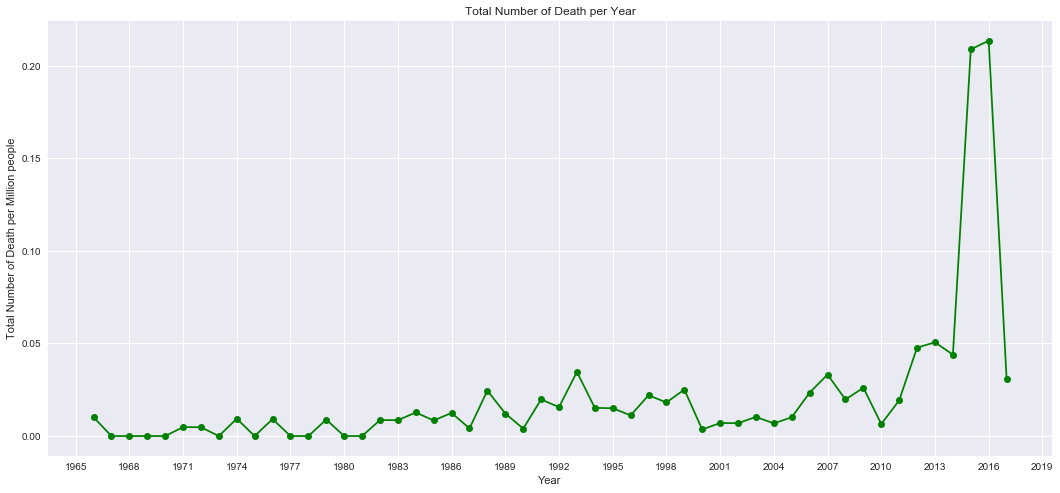

In [822]:
pop_num = df_popu.population #Population column from df_popu
fatal_sum = df.Fatalities.resample('AS').sum() # Total numbers of fatalities
fatal_pop = fatal_sum / pop_num # Number of attacks per population
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(date,fatal_count,'-o', color = 'g')
# major labels
ax.xaxis.set_major_locator(mdates.YearLocator(3,month=1,day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# grid lines
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines
plt.xlabel('Year')
plt.ylabel('Total Number of Death per Million people')
plt.title('Total Number of Death per Year')

# What are the causes or reasons giving by the shooters?

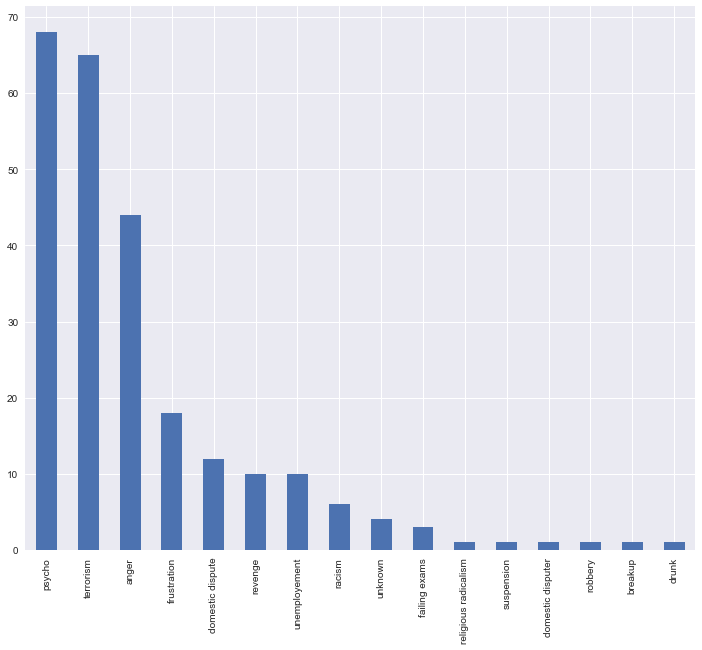

In [823]:
df.Cause.value_counts().plot(kind = 'bar', figsize=(12, 10))

The reasons given for most shootings are Psyco, terrorism and anger.

# Is there any correlation between shooter and his/her race, gender

In [824]:
df.Race.value_counts()

White American or European American                    122
Black American or African American                     76 
Unknown                                                42 
Some other race                                        20 
white                                                  12 
Asian American                                         11 
White                                                  9  
Asian                                                  6  
Latino                                                 5  
Black                                                  5  
Native American or Alaska Native                       3  
black                                                  3  
Two or more races                                      2  
Other                                                  2  
Asian American/Some other race                         1  
White American or European American/Some other Race    1  
Black American or African American/Unknown             1

In [825]:
# Clean up Race Column
df.Race = df.Race.str.replace('White American or European American', 'White')
df.Race = df.Race.str.replace('Black American or African American', 'Black')
df.Race = df.Race.str.replace('Some other race', 'Other')
df.Race = df.Race.str.replace('Unknown', 'Other')
df.Race = df.Race.str.replace('white', 'White')
df.Race = df.Race.str.replace('Asian American', 'Asian')
df.Race = df.Race.str.replace('black', 'Black')
df.Race = df.Race.str.replace('Black American or African American/Unknown', 'Black')
df.Race = df.Race.str.replace('Asian American/Some other race', 'Asian')
df.Race = df.Race.str.replace('White American or European American/Some other Race', 'White')
df.Race = df.Race.str.replace('White/Some other Race', 'White')
df.Race = df.Race.str.replace('Black/Other', 'Black')
df.Race = df.Race.str.replace('Asian/Other', 'Asian')

In [826]:
df.Race.value_counts()

White                               144
Black                               85 
Other                               64 
Asian                               18 
Latino                              5  
Native American or Alaska Native    3  
Two or more races                   2  
Name: Race, dtype: int64

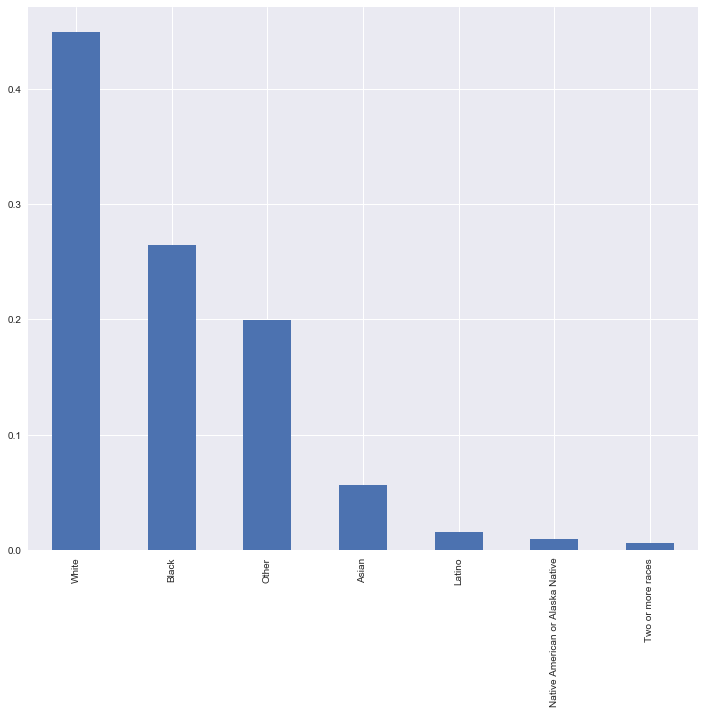

In [827]:
#df.Race.value_counts().plot(kind = 'pie', figsize=(12, 10), autopct='%.2f%%')

df.Race.value_counts(normalize = True).plot(kind = 'bar', figsize=(12, 10))

Shooters race breakdown:
    White = 44.86%
    Black = 26.48%
    Other = 19.94%
    Asian = 5.61%
    Latino = 1.56%
    Native Americans = 0.93%
    Two or more race = 0.62%

In [828]:
df_race = df.groupby(pd.Grouper(key='Date', freq='5AS'))['Race'].value_counts()
df_race

Date        Race                            
1966-01-01  White                               2 
1971-01-01  White                               2 
            Black                               1 
            Other                               1 
1976-01-01  White                               3 
            Black                               1 
1981-01-01  White                               6 
            Black                               2 
            Asian                               1 
1986-01-01  White                               10
            Black                               3 
            Other                               1 
1991-01-01  White                               16
            Asian                               4 
            Black                               3 
            Other                               3 
1996-01-01  White                               15
            Black                               4 
            Other                    

# Shooters Race Distribution per 5 years Interval

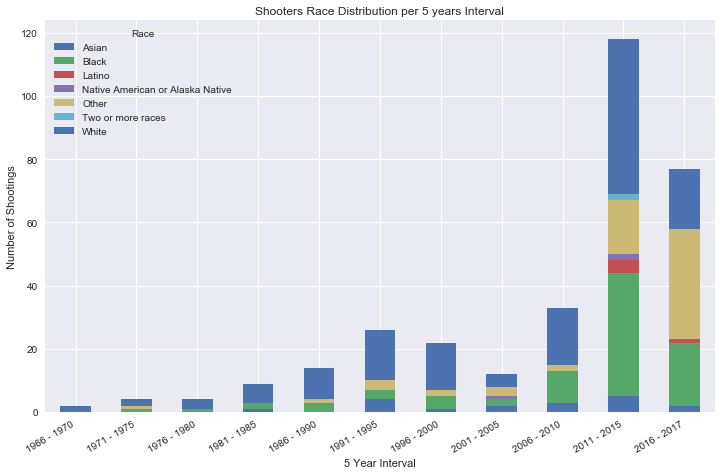

In [829]:
five_year_int = ['1966 - 1970','1971 - 1975','1976 - 1980','1981 - 1985','1986 - 1990','1991 - 1995','1996 - 2000',
'2001 - 2005','2006 - 2010','2011 - 2015','2016 - 2017'] 

unstack_race = df_race.unstack()
ax = unstack_race.plot(kind='bar',x=unstack_race.index,stacked=True,figsize=(12,8))
plt.title('Shooters Race Distribution per 5 years Interval')
plt.xlabel('5 Year Interval')
plt.ylabel('Number of Shootings')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(five_year_int))
ax.yaxis.grid(False,'minor') 
ax.yaxis.grid(True,'major') 
plt.gcf().autofmt_xdate()

As we can see from the graph, the white race seems to dominate the gross shooting numbers every single year.

# Any correlation with calendar dates? Do we have more deadly days, weeks or months on average?

What day has the most attacks?

In [830]:
df['Day_of_week'] = df['Date'].dt.weekday_name  # To get Weekday names
df['Day_of_week'].value_counts()

Thursday     57
Sunday       53
Friday       51
Wednesday    46
Monday       43
Saturday     39
Tuesday      34
Name: Day_of_week, dtype: int64

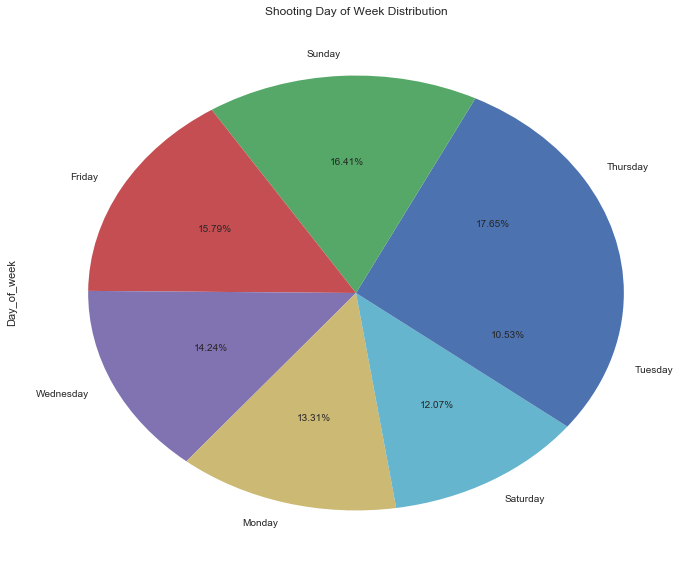

In [831]:
df['Day_of_week'].value_counts().plot(kind = 'pie', figsize=(12, 10), autopct='%.2f%%')
plt.title('Shooting Day of Week Distribution')

Most attacks happened on Thursday and Sunday but the percentage is not high enough to make a conclusive decision. Attack days appear to be random. 

# What day is the most deadly?

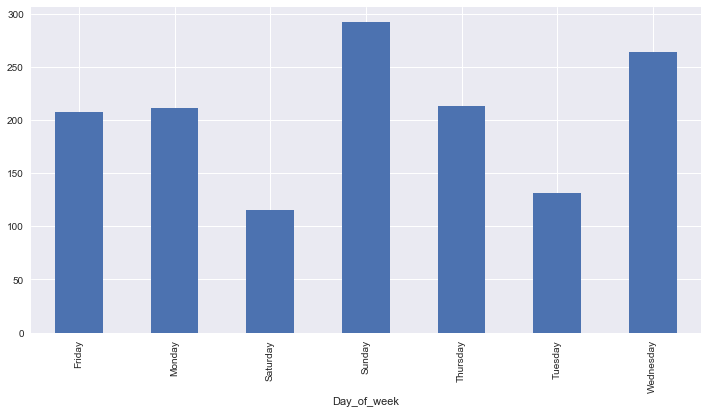

In [832]:
df.groupby('Day_of_week').Fatalities.sum().plot(kind = 'bar', figsize=(12, 6))

# What Month has the most attacks?

In [833]:
df['month_of_year']= df.Date.dt.month
month_of_year = df.month_of_year.value_counts().sort_index()

In [834]:
month_of_year

1     28
2     53
3     42
4     34
5     19
6     18
7     16
8     22
9     16
10    24
11    22
12    29
Name: month_of_year, dtype: int64

In [835]:
# fig,ax = plt.subplots(figsize=(10,10))
# ax.pie(x=month_of_year,labels=month_of_year.index, autopct='%.2f%%')
# plt.title('Month of Year Distribution')

In [836]:
df.head(1)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year,Day_of_week,month_of_year
Date,,,,,,,,,,,,,,,,,,,,,,,,
1966-08-01,323,University of Texas at Austin,"Austin, Texas",1966-08-01,University of Texas,Close,random,terrorism,"On August 1, 1966, a 25-year-old engineering student at the University of Texas in Austin killed sixteen people and wounded thirty-two others in and around the Tower of the University of Texas. Prior to commencing the mass shootings at the University, the student and former U.S. Marine, had murdered both his wife and mother in Austin, Texas.",17,32,48,0.0,25,NaN,NaN,Yes,White,Male,30.198887,-97.844159,1966,Monday,8


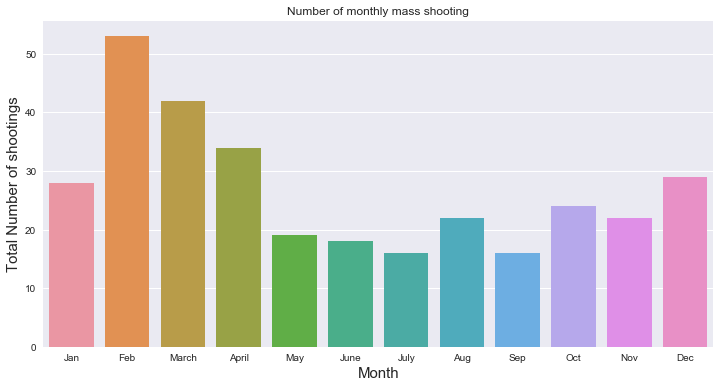

In [837]:
month_counts = df.month_of_year.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(month_counts.index, month_counts.values)
months = ('Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
plt.title('Number of monthly mass shooting')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Number of shootings', fontsize=15)
plt.xticks(range(12), months)
plt.show()

# What day of the Month have the most shootings?

In [838]:
# month_of_year.plot(kind = 'bar', figsize=(12, 6))
# plt.title('Total Number of Attack in each month')
# plt.xlabel('Month')
# plt.ylabel('Total Number of Attacks')

In [839]:
df['Month'] = df['Date'].dt.month

In [840]:
month_counts

2     53
3     42
4     34
12    29
1     28
10    24
11    22
8     22
5     19
6     18
9     16
7     16
Name: month_of_year, dtype: int64

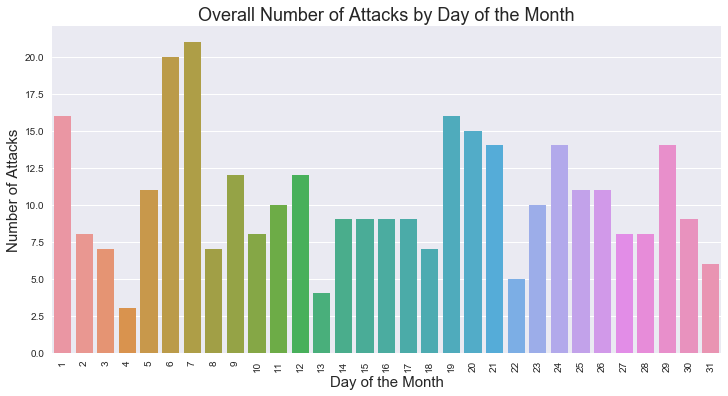

In [841]:
df['Day_of_month'] = df['Date'].dt.day

day_of_month = df['Day_of_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(day_of_month.index, day_of_month.values)
plt.xticks(rotation='vertical')
plt.xlabel('Day of the Month', fontsize=15)
plt.ylabel('Number of Attacks', fontsize=15)
plt.title('Overall Number of Attacks by Day of the Month', fontsize=18)

The spring season seems to have the most attacks.

# The number of attacks per week of the year (Note: There are 52 weeks in a year)

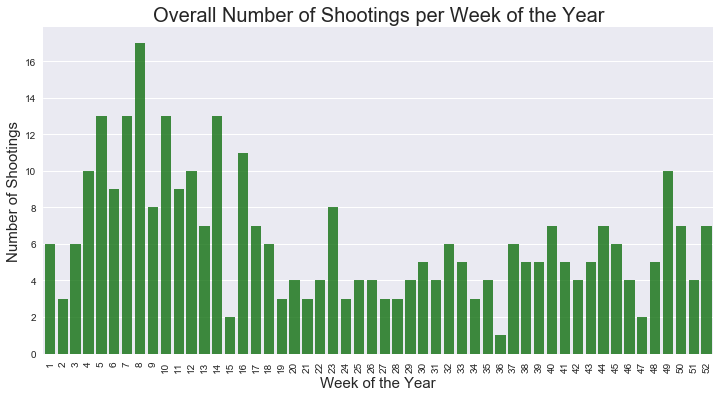

In [842]:
df['Week_of_year'] = df['Date'].dt.weekofyear

cnt_srs = df['Week_of_year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Week of the Year', fontsize=15)
plt.ylabel('Number of Shootings', fontsize=15)
plt.title('Overall Number of Shootings per Week of the Year', fontsize=20)

This confirmed the initial indicator that the spring season seems to have the most shootings.

# How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition.

In [843]:
# Clean up Race Column
df['Mental Health Issues'] = df['Mental Health Issues'].str.replace('unknown', 'Unknown')
df['Mental Health Issues'] = df['Mental Health Issues'].str.replace('Unclear', 'Unknown')

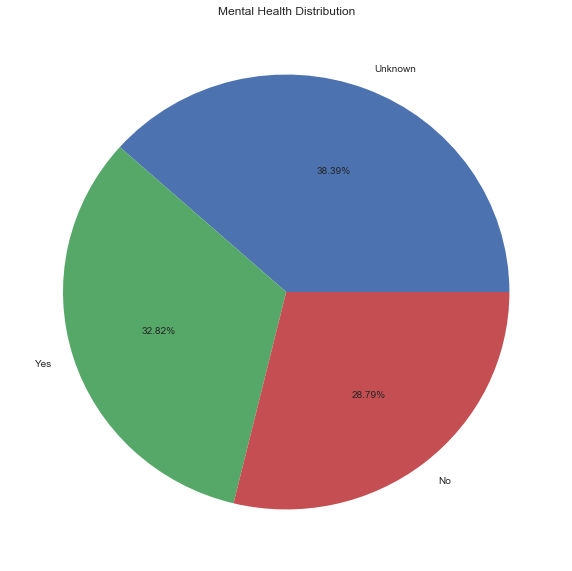

In [844]:
mental = df['Mental Health Issues'].value_counts()
fig,ax = plt.subplots(figsize=(10,10))
ax.pie(x=mental,labels=mental.index, autopct='%.2f%%')
plt.title('Mental Health Distribution')

In [845]:
df['Mental Health Issues'].value_counts()

Unknown    124
Yes        106
No         93 
Name: Mental Health Issues, dtype: int64

It is really hard to tell due to so many unknown status and other unknown variables.

# What Gender does most shooters represent?

In [846]:
df.Gender.value_counts()

Male           272
Unknown        21 
M              20 
Female         5  
Male/Female    4  
M/F            1  
Name: Gender, dtype: int64

In [847]:
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x=='M' else x)
df['Gender'] = df['Gender'].apply(lambda x: 'Unknown' if x=='M/F' or x=='Male/Female' else x)

In [848]:
gender = df.Gender.value_counts()
gender

Male       292
Unknown    26 
Female     5  
Name: Gender, dtype: int64

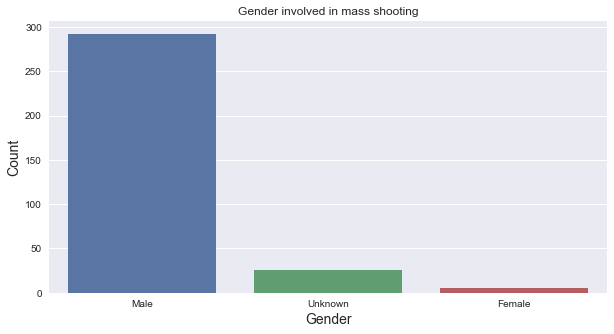

In [849]:
plt.figure(figsize=(10,5))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

# Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event.

(-0.5, 399.5, 199.5, -0.5)

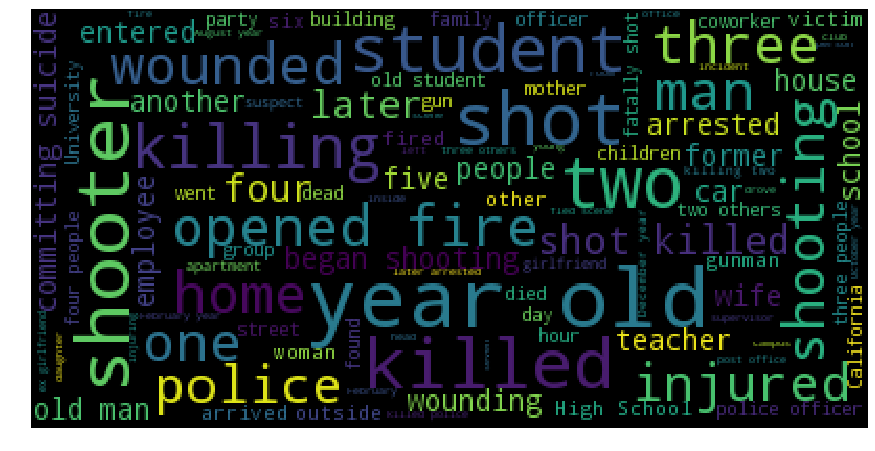

In [850]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=100,
                      max_font_size=40).generate(str(df['Summary']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')

# Let's explore some of the words with high number of the descriptions.

Firstly, let find the summary block for the word unemployed.

In [851]:
unemployed = df[df['Summary'].str.contains('unemployed')][['Title','Summary']]
unemployed

,Title,Summary
Date,,
1984-07-18,McDonald's restaurant in San Ysidro,"On July 18, 1984, a 41-year-old unemployed man, walked into a McDonald's restaurant in San Ysidro, California, killing twenty-one people and injuring nineteen others. The shooter was killed at the scene by a SWAT team sniper perched on the roof next door."
1988-09-26,Oakland Elementary School,"On September 26, 1988, an unemployed 19-year-old man entered the Oakland Elementary School in Greenwood, South Carolina. He was arrested after killing two 8-year-old girls and injuring seven other students and two teachers. He was later found ""guilty but mentally ill."""
1989-01-17,Cleveland Elementary School,"On January 17, 1989, an unemployed 24-year-old man arrived to Cleveland Elementary School in Stockton, California. He set his car on fire in the parking lot, before entering the school to begin shooting. The shooter killed five students and injured thirty others including a teacher, before killing himself."
1991-10-16,"Luby's Cafeteria in Killeen, Texas","On October 16, 1991, a 35-year old unemployed seaman drove his truck through a window at Luby's Cafeteria in Killeen, Texas. He then opened fire, killing twenty-three people and wounding twenty before turning the gun on himself."
2007-12-24,"Carnation, Washington","On December 24, 2007, an unemployed woman and her boyfriend, both aged 29, shot the woman's father in regards to a financial dispute in his home in Carnation, Washington. The couple then shot the woman's mother before her brother, his wife and children arrived, upon which the couple shot and killed all four. They were later arrested in the home."
2012-12-11,Clackamas Town Center,"On December 11, 2012, an unemployed 22-year old run into Clackamas Town Center, a shopping center outside the City of Portland, Oregon. The gunman opened fire on shoppers and employees killing two people and seriously wounding a third person before committing suicide."
2013-02-19,"Ladera Ranch, Santa Ana, Tustin and Orange","On February 19, 2013, a 20-year old unemployed, part-time student killed a 20-year old woman at his parent's house. The shooter's parents called 911 when they heard the noise. He drove off in his parents car and went on a killing spree carjacking several cars and shooting at commuters, drivers, and construction workers. He committed suicide when police were approaching. The shooter had left a suicide note that he wrote within an hour of the 911 call his parents made."
2013-03-13,Mohawk and Herkimer Villages in New York,"On March 13, 2013, an unemployed 64-year old man set his apartment on fire in Mohawk village, New York, before he went into a local barbershop and shot four people, killing two and wounding two others. Afterwards, the shooter drove to Herkimer village, where he shot and killed to other people at a local car servicing business. After the rampage, he holed up in an abandoned building where he had a standoff with police for 18 hours until he was shot and killed."
2013-08-05,Ross Township Supervisor Council Meeting,"On August 5, 2013, an unemployed 59-year old man went to Ross Township's monthly meeting in Salisbury, Pennsylvania, killing three people and injuring four more. The shooter was later restrained and shot in the leg by civilians at the scene. He had been forced to vacate his property of 20 years and had been living out of his car and in abandoned buildings ever since."


In [852]:
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 1984-07-18 to 2013-11-01
Data columns (total 2 columns):
Title      10 non-null object
Summary    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


In [853]:
students= df[df['Summary'].str.contains('students')][['Title','Summary']]
students

,Title,Summary
Date,,
1976-02-19,Los Angeles Computer Learning Center,"On February 19, 1976, a 18-year-old student at a Los Angeles computer school opened fire during a test at his fellow students with a shotgun, killing one student and wounding several others. When trying to escape, he was apprehended by a security guard who exchanged fire with the shooter, leaving him critically wounded. The security guard was injured during the exchange."
1979-10-06,University of South Carolina,"On October 6, 1979, a 19-year-old student at University of South Carolina opened fire at a homecoming weekend fraternity party, killing two students and wounding five others."
1982-03-19,Valley High School,"On March 19, 1982, a 17-year-old student walked into Valley High School in Las Vegas, Nevada. The shooter shot and killed a teacher and injured two students."
1986-12-04,Fergus County High School,"On December 4, 1986, a 14-year-old student at Fergus County High School in Lewistown, Montana, disgruntled with his grades, fatally shot a teacher and wounded a vice principal and two students as he fled. He was arrested at his home an hour later."
1988-02-11,Pinellas Park High School,"On February 11, 1988, two students age 15 and 16 were confronted by school personnel regarding firearms they had stolen and carried on campus. The shooting began after the staff attempted to physically restrain the students, and ended with an assistant principal killed and two others injured."
1988-05-20,Hubbard Woods Elementary School,"On May 20, 1988, a 30-year-old woman entered the Hubbard Woods Elementary School with the intent to target her former in-laws' children who she believed attended the school. After shooting a boy in a bathroom down the hall, she entered a second-grade classroom and began shooting the students, killing one and injuring five more. She fled the scene and entered a home, where she injured another young man before turning the gun on herself in a bedroom."
1988-09-26,Oakland Elementary School,"On September 26, 1988, an unemployed 19-year-old man entered the Oakland Elementary School in Greenwood, South Carolina. He was arrested after killing two 8-year-old girls and injuring seven other students and two teachers. He was later found ""guilty but mentally ill."""
1989-01-17,Cleveland Elementary School,"On January 17, 1989, an unemployed 24-year-old man arrived to Cleveland Elementary School in Stockton, California. He set his car on fire in the parking lot, before entering the school to begin shooting. The shooter killed five students and injured thirty others including a teacher, before killing himself."
1991-08-09,Wat Promkunaram Buddhist Temple,"On the evening on August 9, 1991, two high school students in the Air Force ROTC program entered a Buddhist monastery intending to steal cameras, golden religious paraphernalia and cash from the monks. After looting the monastery and holding the monks hostage, the boys decided to shoot and kill all nine occupants of the house to leave no witnesses of their crime."


# Find the Percent of summary blocks that contain the word unemployed.

In [854]:
print('{0:.1f}% of the summary blocks contain the word unemployed'.format(len(unemployed)/len(df)*100))

0.0% of the summary blocks contain the word unemployed


In [855]:
print('{0:.1f}% of the summary blocks contain the word student'.format(len(students)/len(df)*100))

0.0% of the summary blocks contain the word student


# Visualize mass shootings on the U.S map

In [856]:
import plotly
plotly.__version__

'1.3.1'

In [857]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [858]:

# #df_f = df[df['Fatalities'] > 5]
# df['text'] = 'Fatalities ' + (df['Fatalities']).astype(str) + '<br>' + (df['Location']).astype(str)
# scale = 5
# killed = [dict(
#     type = 'scattergeo',
#     locationmode = 'USA-states',
#     lon = df['Longitude'],
#     lat = df['Latitude'],
#      text = df['text'],
#      marker = dict(
#         size = df['Fatalities']*scale,
#         color = "rgb(0,116,217)",
#         line = dict(width=0.5, color='rgb(40,40,40)'),
#         sizemode = 'area'
#     ),
#     #name = ?
# )]
    
# layout = dict(
#     title = 'Mass Shooting Fatalities',
#     showlegend = False,
#     geo = dict(
#         scope='usa',
#         projection=dict( type='albers usa' ),
#         showland = True,
#         landcolor = 'rgb(217, 217, 217)',
#         subunitwidth=1,
#         countrywidth=1,
#         subunitcolor="rgb(255, 255, 255)",
#         countrycolor="rgb(255, 255, 255)"
#     )
# )
# fig = dict( data=killed, layout=layout )
# iplot( fig)


# What cities and states are more prone to such attacks

In [859]:
#.str.replace(",", " ")

df['City'] = df['Location'].str.rpartition(',')[0]
df['State'] = df['Location'].str.rpartition(',')[2]

In [860]:
df.State.value_counts()

 California        29
 Florida           20
 Texas             16
 Washington        14
 Georgia           13
 North Carolina    11
 Arizona           11
 New York          10
 Ohio              10
 Wisconsin         9 
 Illinois          9 
 Alabama           9 
 Pennsylvania      8 
 Colorado          6 
 Michigan          6 
 Kentucky          5 
 Tennessee         5 
 Virginia          5 
 South Carolina    5 
 Nevada            5 
 Oklahoma          5 
 Kansas            4 
 Massachusetts     4 
 Louisiana         4 
 Mississippi       4 
 Oregon            4 
 Minnesota         4 
 Connecticut       3 
 Missouri          3 
 New Jersey        3 
 New Mexico        3 
 Nebraska          3 
 Montana           2 
 Utah              2 
 CA                2 
 Arkansas          2 
 TX                1 
  Virginia         1 
 Wyoming           1 
 Iowa              1 
 South Dakota      1 
 Indiana           1 
 NV                1 
 LA                1 
 Maine             1 
 WA       

 Let's clean up our 'State' column
 
 1. Replace CA with California
 2. Replace NV with Nevada
 3. Replace LA with Louisiana
 4. Replace PA with Pennsylvania
 5. Replace WA with Washington D.C.
 6. Replace TX with Texas
 7. Replace CO with Colorado
 8. Replace MD with Maryland

In [861]:
df['State'] = df.State.str.strip()
df['State'] = df.State.str.replace('CA', 'California')
df['State'] = df.State.str.replace('NV', 'Nevada')
df['State'] = df.State.str.replace('LA', 'Louisiana')
df['State'] = df.State.str.replace('PA', 'Pennsylvania')
df['State'] = df.State.str.replace('WA', 'Washington D.C.')
df['State'] = df.State.str.replace('TX', 'Texas')
df['State'] = df.State.str.replace('CO', 'Colorado')
df['State'] = df.State.str.replace('MD', 'Maryland')

In [862]:
df.State.value_counts()

California         31
Florida            20
Texas              18
Washington         14
Georgia            13
Arizona            11
North Carolina     11
New York           10
Ohio               10
Alabama            9 
Pennsylvania       9 
Wisconsin          9 
Illinois           9 
Colorado           7 
Nevada             6 
Michigan           6 
Virginia           6 
South Carolina     5 
Oklahoma           5 
Kentucky           5 
Tennessee          5 
Louisiana          5 
Massachusetts      4 
Oregon             4 
Mississippi        4 
Minnesota          4 
Kansas             4 
Nebraska           3 
Connecticut        3 
Missouri           3 
New Mexico         3 
New Jersey         3 
Montana            2 
Arkansas           2 
Washington D.C.    2 
Utah               2 
West Virginia      1 
Idaho              1 
Hawaii             1 
Wyoming            1 
Maine              1 
Alaska             1 
Indiana            1 
Iowa               1 
Vermont            1 
South Dako

# States with most Shootings

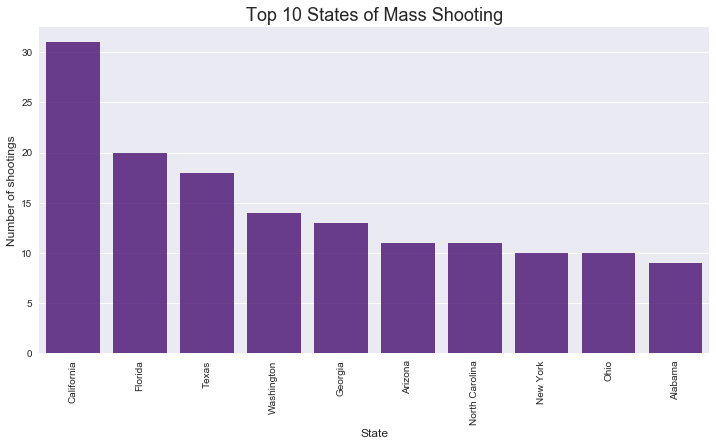

In [863]:
cnt_srs = df['State'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='indigo')
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of shootings', fontsize=12)
plt.title('Top 10 States of Mass Shooting', fontsize=18)

California, Florida and Texas seems to have the highest shootings

# Cities with most Shootings

In [864]:
df.City.value_counts()

Seattle                                         5
Killeen                                         4
Phoenix                                         4
Las Vegas                                       4
Omaha                                           3
Los Angeles                                     3
Dallas                                          3
Chicago                                         3
New Orleans                                     3
Tucson                                          3
Orlando                                         3
San Francisco                                   3
Cleveland                                       3
Chelsea                                         2
Colorado Springs                                2
Atlanta                                         2
Birmingham                                      2
Menasha                                         2
Louisville                                      2
Aurora                                          2


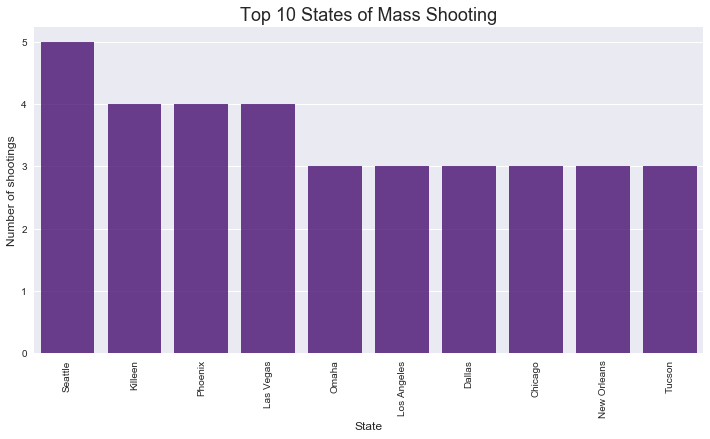

In [865]:
cnt_srs = df['City'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='indigo')
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of shootings', fontsize=12)
plt.title('Top 10 States of Mass Shooting', fontsize=18)

Replace Missing Values with Unknown

In [866]:
df.Location.fillna('Unknown', inplace=True)
df.City.fillna('Unknown', inplace=True)
df.State.fillna('Unknown', inplace=True)

In [867]:
#Visualize mass shootings on US map

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
us_map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

us_map.drawcoastlines() #zorder=3
us_map.drawmapboundary(zorder=0) #fill_color='#9fdbff'
us_map.fillcontinents(color='#ffffff',zorder=1) #,lake_color='#9fdbff',alpha=1
us_map.drawcountries(linewidth=1.5, color='darkblue') #color='darkblue'
us_map.drawstates(zorder=3) #zorder=3
#plt.show()

#Set county location values, shooting level values, marker sizes (according to county size), colormap and title 
x, y = us_map(md.Longitude.tolist(), md.Latitude.tolist())
colors = (d['Total victims']).tolist()
sizes = (d['Total victims']*2).tolist()
cmap = plt.cm.YlOrRd
sm = ScalarMappable(cmap=cmap)
plt.title('US shooting victims')

scatter = ax.scatter(x,y,s=sizes,c='r',cmap=cmap,alpha=1,edgecolors='face',marker='o',zorder=3)
plt.show()

ImportError: No module named basemap